# Suicides in India: What Data Shows?

## Introduction:
Suicide or ending one’s own life is a tragic event with strong emotional repercussions for its survivors and for families of its victims.

**India accounts for a growing share of the world’s suicides.**

The nation accounts for over a third of the world's annual female suicides and nearly a fourth of male suicides, a significant rise in global share from 1990.

Each suicide is a personal tragedy that prematurely takes the life of an individual and has a continuing ripple effect, dramatically affecting the lives of families, friends and communities. Every year, more than 1,00,000
people commit suicide in our country. There are various causes of suicides like
professional/career problems, discrimination,sense of isolation, abuse, violence, family problems, mental disorders, addiction to alcohol, financial loss, chronic pain etc. 

## Objective and Scope of the Project

### Objective :
The primary objective of the study are:

*   Study suicide rates for various locations in India.
*   Identify the major causes that contribute to the most of the suicide attacks in India.
*   Analyse Suicides attacks on the basis of means and status of victims.

### Scope :
This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

Tools used for Visualisation : Tableau and Python Visualisation Libraries

## Content :
Time Period: 2001 - 2012 

Granularity: Yearly 

Location: States and U.T's of India

**Parameters:**

a) Suicide causes b) Education status c) By means adopted d) Professional profile e) Social status

## Acknowledgements:
##### Data-Source:
National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India.




## Importing Necessary Packages and files

In [0]:
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (58.5 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     \ 166.7MB 34.2MB/s
     |████████████████████████████████| 10.1MB 46.8MB/s 
     |████████████████████████████████| 225kB 59.4MB/s 
  Created wheel for basemap: filename=basem

In [0]:
!pip install colorama

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'arial'
import matplotlib  
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

from PIL import Image
import matplotlib.image as mpimg 

import plotly.graph_objects as go

from subprocess import check_output


from colorama import Fore, Back, Style


In [0]:
from google.colab import files
datafile=files.upload()

Saving Suicides in India 2001-2012.csv to Suicides in India 2001-2012 (1).csv


In [0]:
!ls

 agee.PNG	  Capturestate.PNG  'India Shapefile With Kashmir.zip'
 Capture1.PNG	  Capturewb.PNG      India_SHP.zip
 Captureage.PNG   edno.PNG	     sample_data
 Captureno.PNG	  india1.PNG	    'Suicides in India 2001-2012.csv'
 Capturepie.PNG   India2.PNG


In [0]:
!unzip "India Shapefile With Kashmir.zip" -d india3

Archive:  India Shapefile With Kashmir.zip
   creating: india3/India Shape/
  inflating: india3/India Shape/india_ds.dbf  
  inflating: india3/India Shape/india_ds.shp  
  inflating: india3/India Shape/india_ds.shx  
  inflating: india3/India Shape/india_st.dbf  
  inflating: india3/India Shape/india_st.shp  
  inflating: india3/India Shape/india_st.shx  


In [0]:
!unzip "India_SHP.zip" -d india2

Archive:  India_SHP.zip
  inflating: india2/INDIA.dbf        
  inflating: india2/INDIA.prj        
  inflating: india2/INDIA.sbn        
  inflating: india2/INDIA.sbx        
  inflating: india2/INDIA.shp        
  inflating: india2/INDIA.shx        


## Loading Data

In [0]:
df=pd.read_csv("Suicides in India 2001-2012 (1).csv")

In [0]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [0]:
df.shape

(237519, 7)

***# Rename Union Territories***

In [0]:
df.replace('A & N Islands (Ut)', 'Andaman & Nicobar Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'Dadar & Nagar Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

***# Drop rows where total is zero.***

In [0]:
df = df.drop(df[df.Total==0].index)
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

## Number and Percentage Share of Suicides in States/UTs 

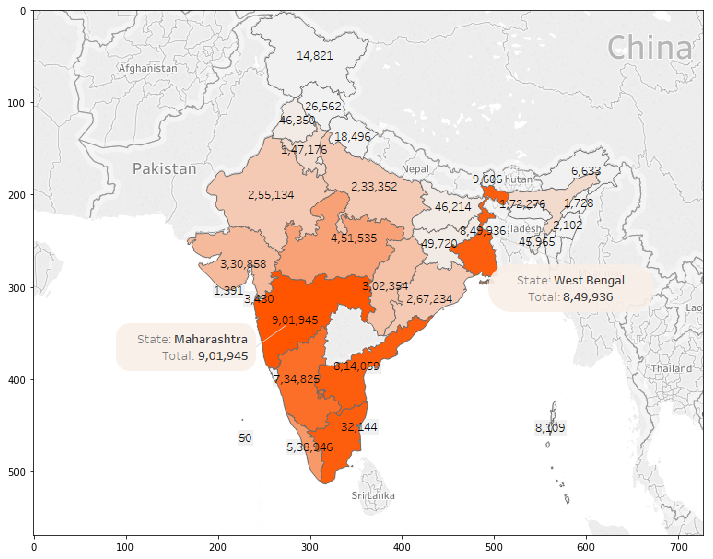

In [0]:
# Read Images 
img = mpimg.imread('Capturestate.PNG') 
  
# Output Images 
plt.figure(figsize=(12,12))
plt.imshow(img)

**Maharashtra and West Bengal accounts for the highest number of suicide victims.**

In [0]:
state = df.groupby('State').agg({'Total':"sum"})

In [0]:
state.reset_index(inplace=True)
state.sort_values(by=['Total'],inplace=True,ascending=False)

### **State/UT wise Major Percentage Share of Suicides in States during 2001-2012**

In [0]:
print(Fore.RED +" Hover over to see total suicide victims in each State")
fig = go.Figure(data=[go.Pie(labels=state.State, 
                            values=state.Total)])
fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=10,
                  marker=dict(line=dict(color='#000000', width=0.05)))
fig.show()

 Hover over to see total suicide victims in each State


    Year   Total
0   2001  542440
1   2002  551980
2   2003  554218
3   2004  568349
4   2005  569545
5   2006  590543
6   2007  613119
7   2008  625014
8   2009  635429
9   2010  672926
10  2011  677159
11  2012  647288


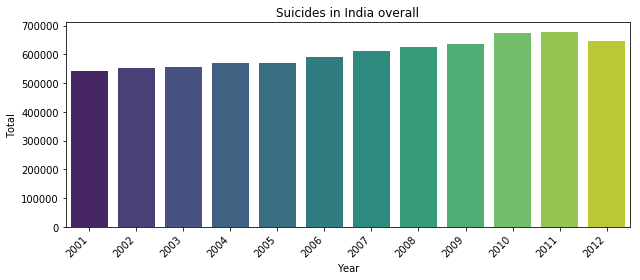

In [0]:
# Suicide rate every year
overall = df.groupby(['Year']).agg({'Total':'sum'})
overall.reset_index(inplace=True)
print(overall)
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

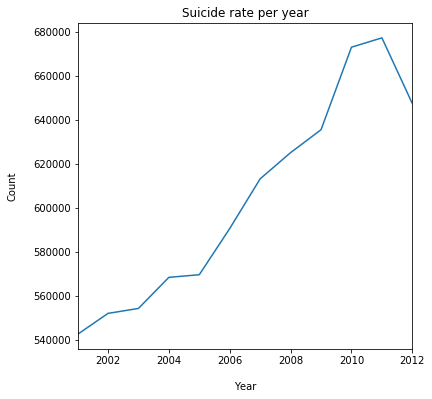

In [0]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot('line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

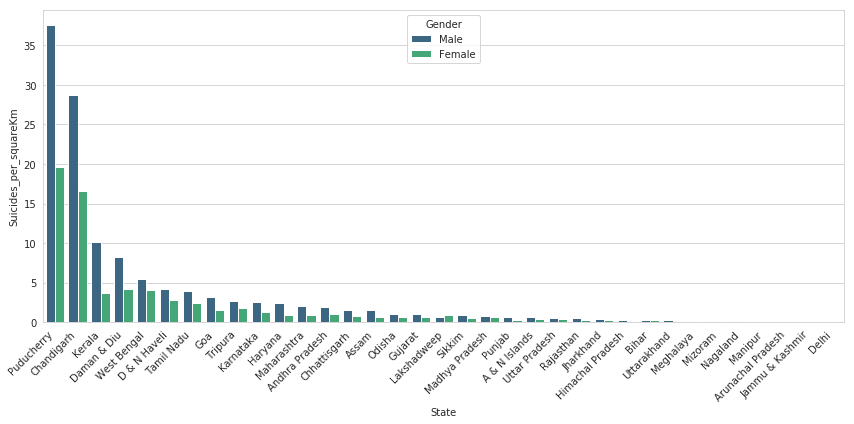

In [0]:
plt.figure(figsize=(12,6))
st = df.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]
# values for areas are taken from wikipedia
statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state]
st['Suicides_per_squareKm'] = st['Total']/st['Area']
sortedStates = st.sort_values('Suicides_per_squareKm',ascending=False)
sns.barplot(x='State',y='Suicides_per_squareKm',data=sortedStates,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

**Union territories whose area is much smaller compared other states have higher number of suicides per square kilometre. Again, Kerala is an exception here as it larger compared all other union territories. Kerala is followed by West Bengal and Tamil Nadu among the Indian states to register higher number of suicides.**

## Who makes more suicide attempts Male or Female?

In [0]:
gender=df.groupby('Gender').agg({'Total':'sum'})
gender.reset_index(inplace=True)
print(gender)

   Gender    Total
0  Female  2606922
1    Male  4641088


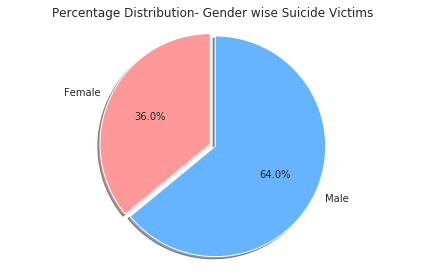

<Figure size 720x576 with 0 Axes>

In [0]:
explode = (0.05, 0)  
fig1, ax1 = plt.subplots()
colors = ['#ff9999','#66b3ff']
ax1.pie(gender.Total, explode=explode ,autopct='%1.1f%%',
        shadow=True, startangle=90,labels=gender.Gender,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Percentage Distribution- Gender wise Suicide Victims")
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.show()

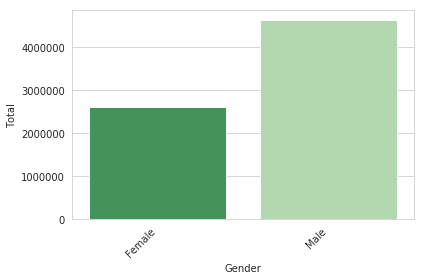

In [0]:
sns.barplot(x='Gender',y='Total',data=gender,palette='Greens_r')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

## Which Age group makes more suicide attempts?

In [0]:
age_group=df[['Age_group','Total','Gender']]
age_group.reset_index(inplace=True)
age_group=age_group.drop(age_group[(age_group.Age_group =='0-100+')].index)

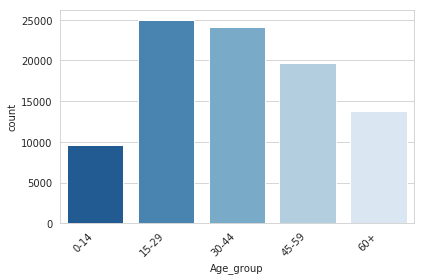

In [0]:
sns.countplot(age_group.Age_group,palette="Blues_r")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

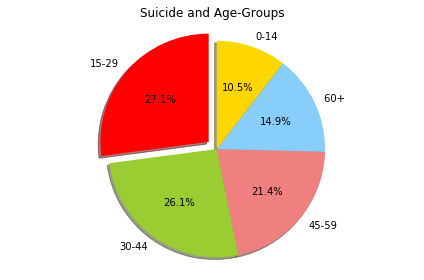

<Figure size 720x576 with 0 Axes>

In [0]:
# Pie chart
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','gold']
labels=["15-29","30-44","45-59","60+ "  ,"0-14" ]
explode = (0.1, 0, 0, 0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(age_group['Age_group'].value_counts(), explode=explode ,autopct='%1.1f%%',
        shadow=True, startangle=90,labels=labels,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Suicide and Age-Groups")
ax1.axis('equal')  
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.show()

**Middle aged people (30 and above- below 44 years) and Youth (15 and above- below 30 years) were the most vulnerable groups resorting to suicides**

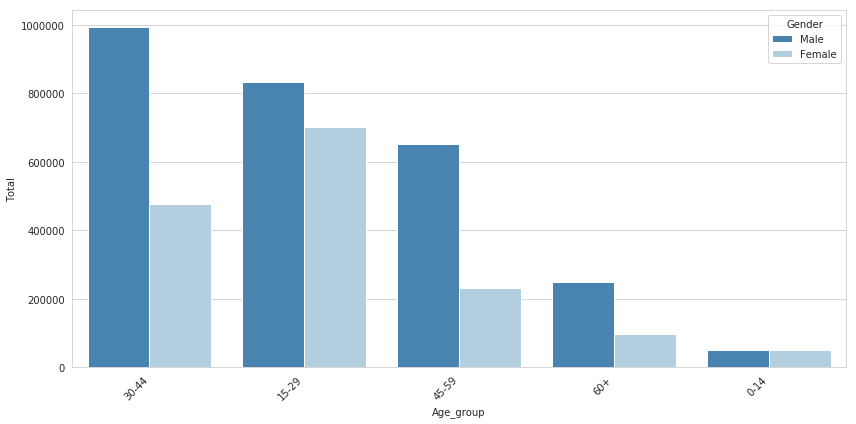

In [0]:
plt.figure(figsize=(12,6))
agSort = age_group.groupby(['Age_group','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Age_group',y='Total',hue='Gender',data=agSort,palette="Blues_r")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [0]:
# Type codes into new DataFrames
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

## Education level and Suicide

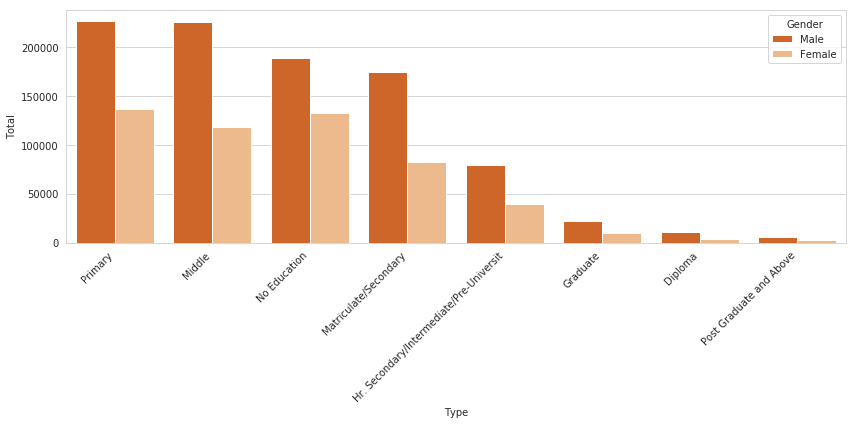

In [0]:
plt.figure(figsize=(12,6))
eduDf = eduDf[['Type','Gender','Total','State']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='Oranges_r')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


In [0]:
print(Fore.RED +" Hover over to see total suicide victims by Educational Status")
plt.figure(figsize=(12,12))
color_palette_list = ['#66b3ff','#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC','#ff9999']
edSort = eduDf.groupby(['Type'],as_index=False).sum().sort_values('Total',ascending=False)
trace = go.Pie(labels=edSort.Type, 
               hoverinfo='label+value', 
               values=edSort.Total, 
               textposition='outside',textinfo='percent+label',
               marker=dict(colors=color_palette_list[0:]),
              rotation=90)
layout = go.Layout(
                    title="Percentage Share of Suicide Victims by Educational Status during 2001-2012",
                    font=dict(family='Arial', size=12, color='Black'),
                    legend=dict(x=0.9, y=0.5)
                    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

 Hover over to see total suicide victims by Educational Status


<Figure size 864x864 with 0 Axes>

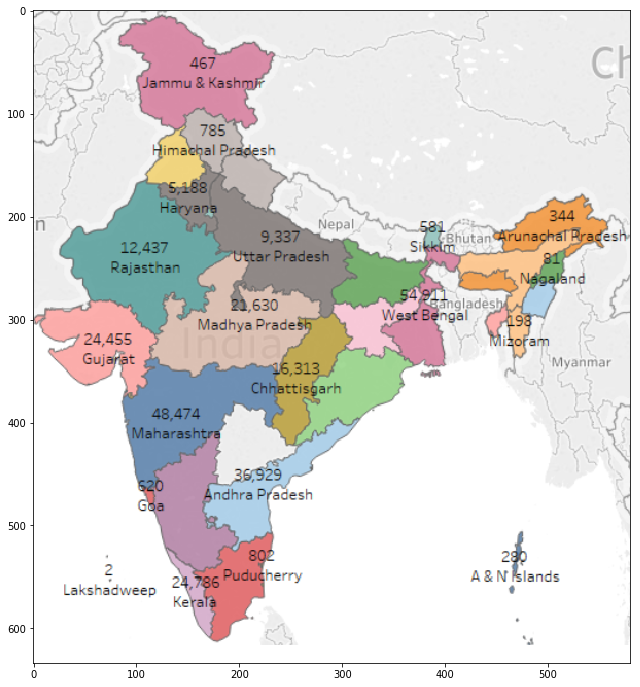

In [0]:
# Read Images 
img = mpimg.imread('Capturewb.PNG') 
  
# Output Images 
plt.figure(figsize=(12,12))
plt.imshow(img)

**Out of 3,62,827 suicides committed by persons educated up-to primary level, 54911 were reported in West Bengal, followed by 48474 in Maharashtra .**

Using Basemaps to highlight these 2 States.

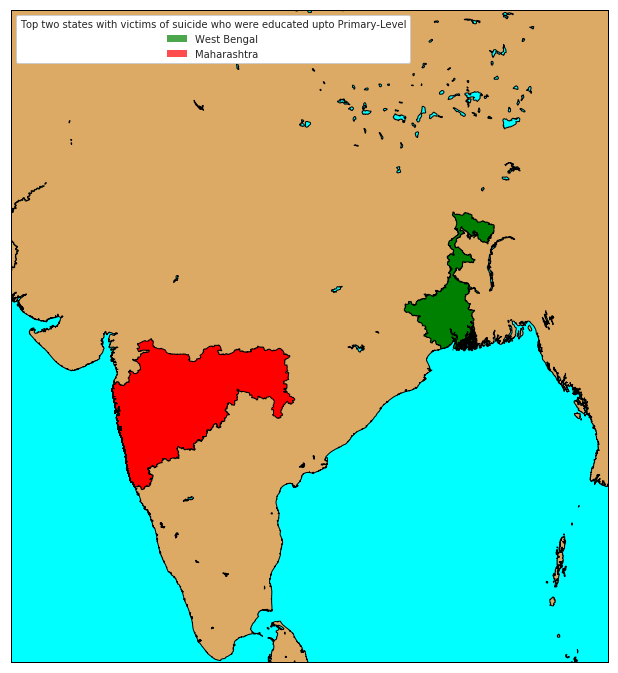

In [0]:
# Using Base-Maps
fig     = plt.figure(figsize=(12,12))
ax1      = fig.add_subplot(111)

map3 = Basemap(projection='merc',llcrnrlon=68.1, llcrnrlat= 8, urcrnrlon=95, urcrnrlat=35, resolution='h')


map3.drawmapboundary(fill_color='aqua')
map3.fillcontinents(color='#ddaa66',lake_color='aqua')
map3.drawcoastlines()


map3.readshapefile('india2/INDIA', 'INDIA', drawbounds = False)


patches1   = []
patches2=[]

for info, shape in zip(map3.INDIA_info, map3.INDIA):
    if info['ST_NAME'] == 'West Bengal':
        patches1.append( Polygon(np.array(shape), True) )
    if info['ST_NAME'] == 'Maharashtra':
        patches2.append( Polygon(np.array(shape), True) )
        
ax1.add_collection(PatchCollection(patches1, facecolor= 'green', edgecolor='k', linewidths=1., zorder=2))
ax1.add_collection(PatchCollection(patches2, facecolor= 'red', edgecolor='k', linewidths=1., zorder=2))

shapes={}
states = ['West Bengal','Maharashtra']
colors= {'West Bengal':"green", 'Maharashtra':"red"}
for info, shape in zip(map3.INDIA_info, map3.INDIA):
    if info['ST_NAME'] in states:
        p= Polygon(np.array(shape), True, facecolor= colors[info['ST_NAME']], 
                   edgecolor='none', alpha=0.7, zorder=2)
        shapes.update({info['ST_NAME'] : p})

for state in states:
    plt.gca().add_artist(shapes[state])

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([shapes[c] for c in states])  
labels.extend(states)                     

plt.legend(handles=handles, labels=labels, framealpha=1.,title='Top two states with victims of suicide who were educated upto Primary-Level',loc='upper left')


plt.show()

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax1,handles=handles, labels=['54911','48474'],
             loc='upper right', framealpha=1.)
ax1.add_artist(leg);
plt.show()

**Out of 321,757 victims of suicide who have no education,5.691% were reported in Andhra Pradesh followed by 4.091% in TamilNadu**


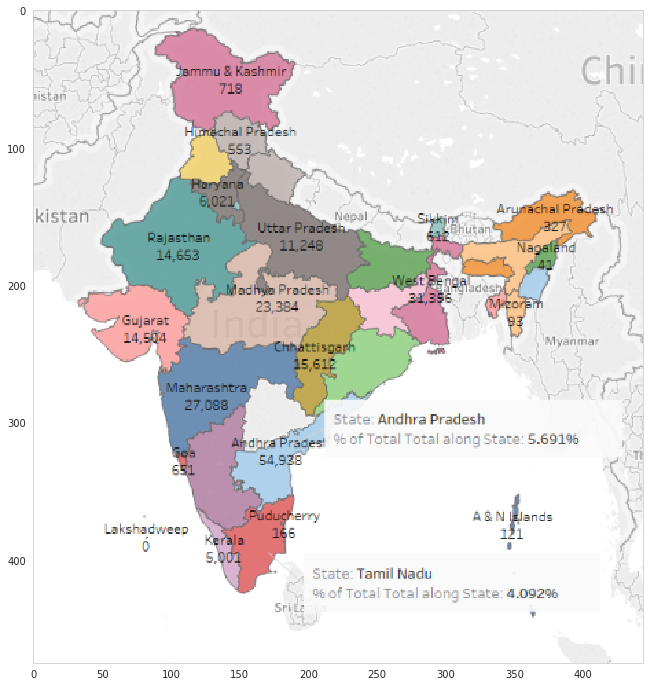

In [0]:
# Read Images 
img = mpimg.imread('edno.PNG') 
plt.figure(figsize=(12,12))
# Output Images 
plt.grid(linewidth='0')
plt.imshow(img)

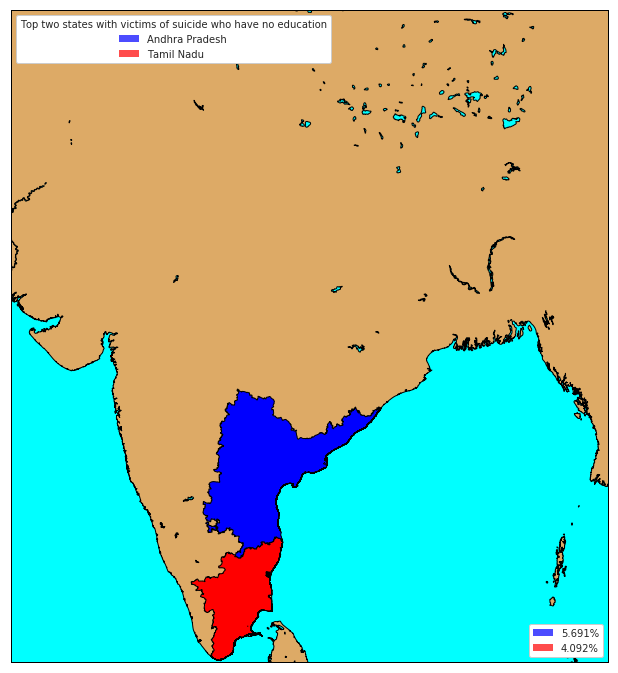

In [0]:
#Using BaseMaps
fig     = plt.figure(figsize=(12,12))
ax1      = fig.add_subplot(111)

#map3 = Basemap(projection='merc',llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=38)
map3 = Basemap(projection='merc',llcrnrlon=68.1, llcrnrlat= 8, urcrnrlon=95, urcrnrlat=35, resolution='h')


map3.drawmapboundary(fill_color='aqua')
map3.fillcontinents(color='#ddaa66',lake_color='aqua')
map3.drawcoastlines()


map3.readshapefile('india2/INDIA', 'INDIA', drawbounds = False)


patches1   = []
patches2=[]

for info, shape in zip(map3.INDIA_info, map3.INDIA):
    if info['ST_NAME'] == 'Andhra Pradesh':
        patches1.append( Polygon(np.array(shape), True) )
    if info['ST_NAME'] == 'Tamil Nadu':
        patches2.append( Polygon(np.array(shape), True) )
        
ax1.add_collection(PatchCollection(patches1, facecolor= 'blue', edgecolor='k', linewidths=1., zorder=2))
ax1.add_collection(PatchCollection(patches2, facecolor= 'red', edgecolor='k', linewidths=1., zorder=2))

shapes={}
states = ['Andhra Pradesh','Tamil Nadu']
colors= {'Andhra Pradesh':"blue", 'Tamil Nadu':"red"}
for info, shape in zip(map3.INDIA_info, map3.INDIA):
    if info['ST_NAME'] in states:
        p= Polygon(np.array(shape), True, facecolor= colors[info['ST_NAME']], 
                   edgecolor='none', alpha=0.7, zorder=2)
        shapes.update({info['ST_NAME'] : p})

for state in states:
    plt.gca().add_artist(shapes[state])

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([shapes[c] for c in states])  
labels.extend(states)                     

plt.legend(handles=handles, labels=labels, framealpha=1.,title='Top two states with victims of suicide who have no education',loc='upper left')

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax1,handles=handles, labels=['5.691%','4.092%'],
             loc='lower right', framealpha=1.)
ax1.add_artist(leg);
plt.show()

## Social Status of Suicide Victims

In [0]:
print(Fore.BLUE +" Hover over to see total suicide victims by Social Status")
plt.figure(figsize=(12,12))
color_palette_list = ['#66b3ff','#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', ]
socialSort = socialDf.groupby(['Type'],as_index=False).sum().sort_values('Total',ascending=False)
trace = go.Pie(labels=socialSort.Type, 
               hoverinfo='label+value', 
               values=socialSort.Total, 
               textposition='outside',textinfo='percent+label',
               marker=dict(colors=color_palette_list[0:]),
              rotation=90)
layout = go.Layout(
                    title="Percentage Share of Suicide Victims by Social Status during 2001-2012",
                    font=dict(family='Arial', size=12, color='Black'),
                    legend=dict(x=0.9, y=0.5)
                    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

 Hover over to see total suicide victims by Social Status


<Figure size 864x864 with 0 Axes>

**Social Status of victims is classified in seven categories namely ‘Married’, ‘Unmarried’, ‘Widowed/Widower’, ‘Divorcee’, ‘Separated’, ‘Others’ and ‘Status Not Known’. 
It observed that 70.2% of the suicide victims were married while 21.9% were un-married (318,301). Separated and Divorcees have accounted for 2.64%  and 1.09% of total suicides victims respectively. The proportion of widowed/widower victims was around 4.27% of total suicides victims.**

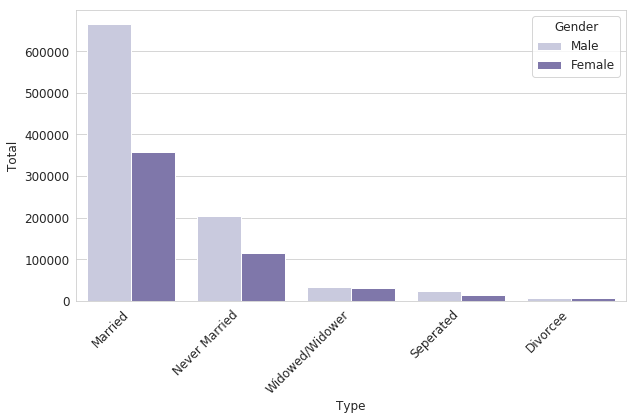

In [0]:
plt.figure(figsize=(9,6))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='Purples')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

## Professional Profile of Suicide Victims

In [0]:
print(" Hover over to see total suicide victims by Professional Status")
plt.figure(figsize=(12,12))
color_palette_list = ['#66b3ff','#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9' ]
profSort = profDf.groupby(['Type'],as_index=False).sum().sort_values('Total',ascending=False)
trace = go.Pie(labels=profSort.Type, 
               hoverinfo='label+value', 
               values=profSort.Total, 
               textposition='outside',textinfo='percent+label',
               marker=dict(colors=color_palette_list[0:]),
              rotation=90)
layout = go.Layout(
                    title="Percentage Share of Suicide Victims by Professioanl Status during 2001-2012",
                    font=dict(family='Arial', size=12, color='Black'),
                    legend=dict(x=0.9, y=0.5)
                    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

 Hover over to see total suicide victims by Professional Status


<Figure size 864x864 with 0 Axes>

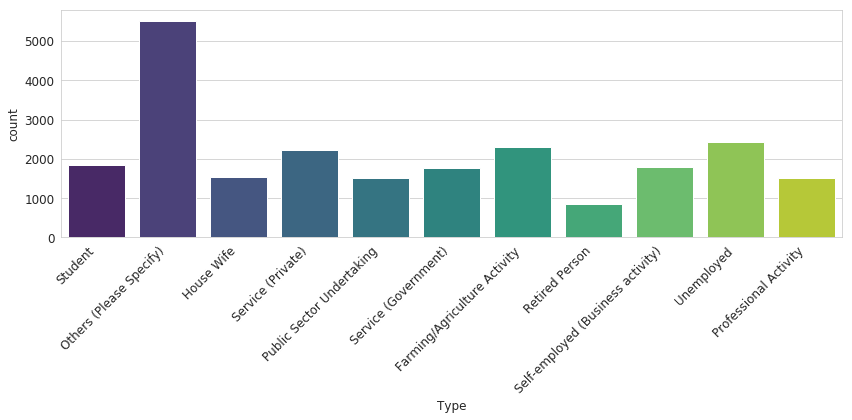

In [0]:
plt.figure(figsize=(12,6))
profDf = profDf[['Type','Gender','Total']]
sns.countplot(x='Type',data=profDf,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [0]:
ct=pd.crosstab(profDf['Type'], profDf['Gender']).apply(lambda r: (r/r.sum())*100, axis=1)
print(ct)


Gender                                 Female       Male
Type                                                    
Farming/Agriculture Activity        39.393939  60.606061
House Wife                         100.000000   0.000000
Others (Please Specify)             45.761481  54.238519
Professional Activity               34.368804  65.631196
Public Sector Undertaking           39.442231  60.557769
Retired Person                      30.190931  69.809069
Self-employed (Business activity)   32.124930  67.875070
Service (Government)                36.871824  63.128176
Service (Private)                   39.596413  60.403587
Student                             48.327940  51.672060
Unemployed                          41.749175  58.250825


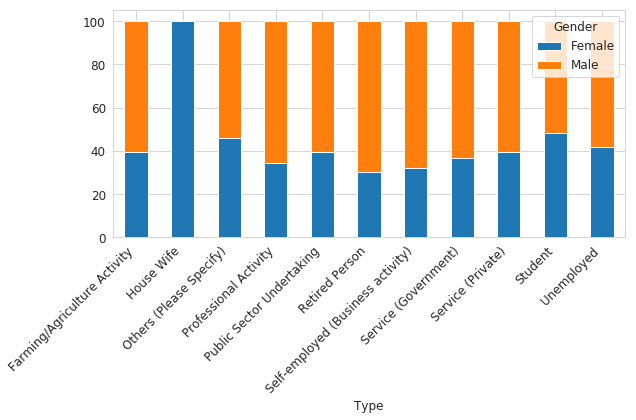

In [0]:

ct.plot(figsize=(9,6),kind='bar',stacked=True)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

**According to the data, most of the females who have committed suicides are house wives. The percentage of female suicides in all other categories is much lower than the percentage of male suicides. While this is an indication of lower representation by women in professional careers, it also reiterates the importance of girl education and women empowerment. The graph shows that financially independent women are much mentally stronger.**

**It is disheartening to see that farmers who feed the rest of the country are the ones who are more committing suicides than any other profession. 
Agriculture is the backbone of India which provides employment to more than 50 percent people and food to all. Moreover, it has a significant contribution in the national income and international trade. However, farming sector is in distressed position and a large number of farmers have committed suicide overall India.**

**Followed by farmers, it's the unemployed and private sector employees who are most effected. It's surprising to know that the number of suicides among the unemployed and the private sector employees is almost the same. This also might be due to higher pressure in private sector when compared to government sector jobs.**

## Means Adopted

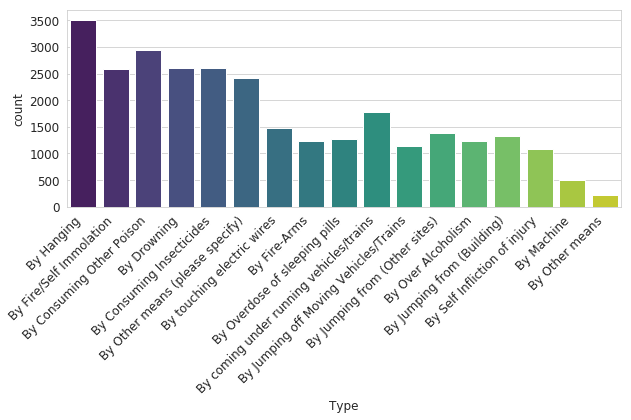

In [0]:
plt.figure(figsize=(9,6))
sns.countplot(x='Type',data=meansDf,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [0]:
plt.figure(figsize=(15,18))
color_palette_list = ['#ADD8E6', '#63D1F4', '#0EBFE9' ]
meansSort = meansDf.groupby(['Type'],as_index=False).sum().sort_values('Total',ascending=False)
trace = go.Pie(labels=meansSort.Type, 
               hoverinfo='label+value', 
               values=meansSort.Total, 
               textposition='outside',textinfo='percent+label',
               marker=dict(colors=color_palette_list[0:]),
              rotation=90)
layout = go.Layout(
                    title="Percentage Share of Suicide Victims by Means they have adopted during 2001-2012",
                    font=dict(family='Arial', size=12, color='Black'),
                    legend=dict(x=0.9, y=0.5)
                    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

<Figure size 1080x1296 with 0 Axes>

In [0]:
ct=pd.crosstab(meansDf['Type'], meansDf['Age_group']).apply(lambda r: (r/r.sum())*100, axis=1)
print(ct)

Age_group                                     0-14  ...        60+
Type                                                ...           
By Consuming Insecticides                15.797546  ...  17.101227
By Consuming Other Poison                15.684282  ...  17.242547
By Drowning                              17.133001  ...  17.171330
By Fire-Arms                              4.935275  ...  10.194175
By Fire/Self Immolation                  13.903950  ...  16.460108
By Hanging                               16.277746  ...  16.960729
By Jumping from (Building)                9.132075  ...  13.660377
By Jumping from (Other sites)             8.815029  ...  14.739884
By Jumping off Moving Vehicles/Trains     7.651715  ...  14.423923
By Machine                                4.563492  ...   8.134921
By Other means                           15.492958  ...  17.840376
By Other means (please specify)          15.817805  ...  18.592133
By Over Alcoholism                        2.524430  ...  18.81

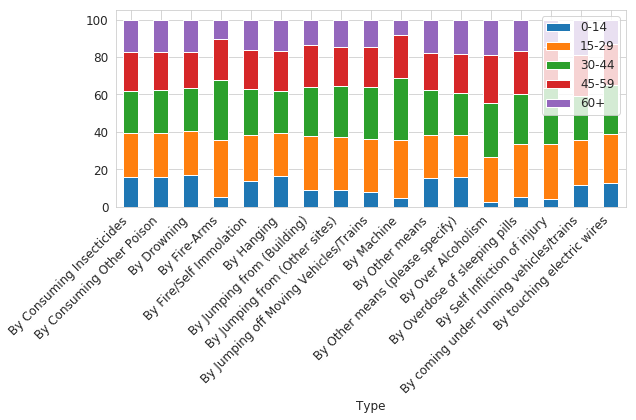

In [0]:
ct.plot(figsize=(9,6),kind='bar',stacked=True)
plt.xticks(rotation=45,ha='right')
plt.legend(loc='best')
plt.tight_layout()

**Hanging is the most frequently used method of suicide.
Materials for hanging were easily accessed and respondents considered it ‘simple’ to perform without the need for planning or technical knowledge.
Hanging was thus seen as the ‘quickest’ and ‘easiest’ method with few barriers to completion and sometimes adopted despite not being a first choice.**

## Major Causes

In [0]:
causesd=causesDf.groupby(['Type','Gender']).agg({'Total':'sum'})

In [0]:
causesd.reset_index(inplace=True)

In [0]:
import plotly.express as px
# Use column names of df for the different parameters x, y, color, ...
fig = px.scatter(causesd, x="Type", y="Total", color='Gender',
                 title="Gender and Major Causes", # customize axis label
                )
fig.update_xaxes(showgrid=False, zeroline=False,title_font=dict(size=18, family='Courier', color='crimson'),tickangle=60)
fig.update_yaxes(showgrid=False, zeroline=False,title_font=dict(size=18, family='Courier', color='crimson'))
fig.show()

While most of the causes of the suicides are not known, the three major causes among the known cases are Family problems, Prolonged illness and mental illness.

According to the data men seem to be badly effected by unemployment, property dispute, poverty,drug abuse or addiction and change in economic status than women.

Number of women who have committed suicides due to dowry disputes is much higher when compared to men,

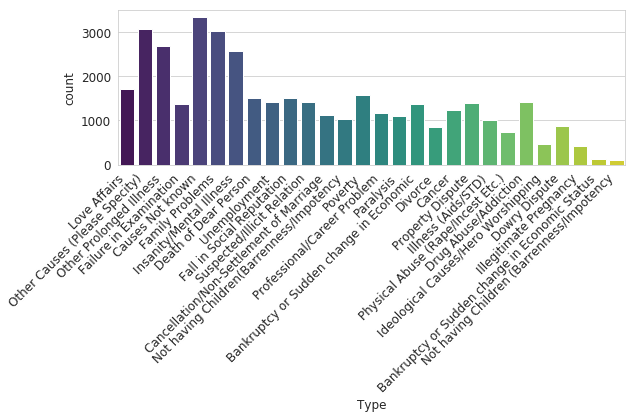

In [0]:
plt.figure(figsize=(9,6))
sns.countplot(x='Type',data=causesDf,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [0]:
ct=pd.crosstab(causesDf['Type'], causesDf['Age_group']).apply(lambda r: r, axis=1)
print(ct)

Age_group                                       0-14  15-29  30-44  45-59  60+
Type                                                                          
Bankruptcy or Sudden change in Economic           61    365    404    340  203
Bankruptcy or Sudden change in Economic Status     8     33     36     29   20
Cancellation/Non-Settlement of Marriage           31    497    400    162   26
Cancer                                            22    244    323    356  288
Causes Not known                                 544    772    752    697  567
Death of Dear Person                             107    412    401    349  242
Divorce                                            4    307    332    171   33
Dowry Dispute                                     35    351    310    153   22
Drug Abuse/Addiction                              64    401    399    330  212
Failure in Examination                           449    599    265     56   10
Fall in Social Reputation                         88

In [0]:
ct=pd.DataFrame(ct)

In [0]:
ct.reset_index(inplace=True)

**At all age groups  family Problems seems to be the major cause for suicide, next stands prolonged illness/mental illness.**

**At age group of 0-14, failure in examination was one of the main cause.**

**0-14 Age Group**


---






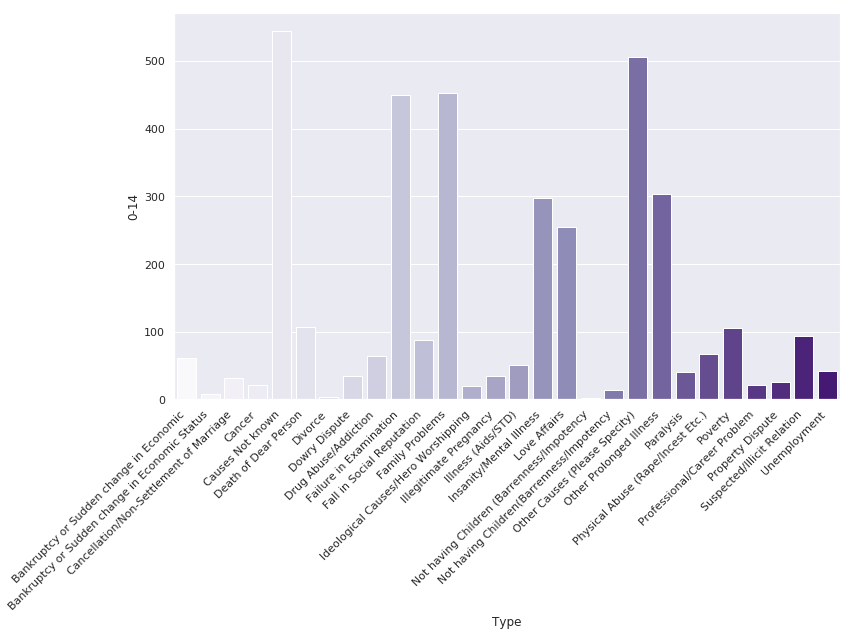

In [0]:
plt.figure(figsize=(12,9))
sns.barplot(x='Type',y='0-14',data=ct,palette='Purples')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

**West Bengal and Tamil Nadu reports for highest suicide victims due to Failure in Examination among age group (0-14)**

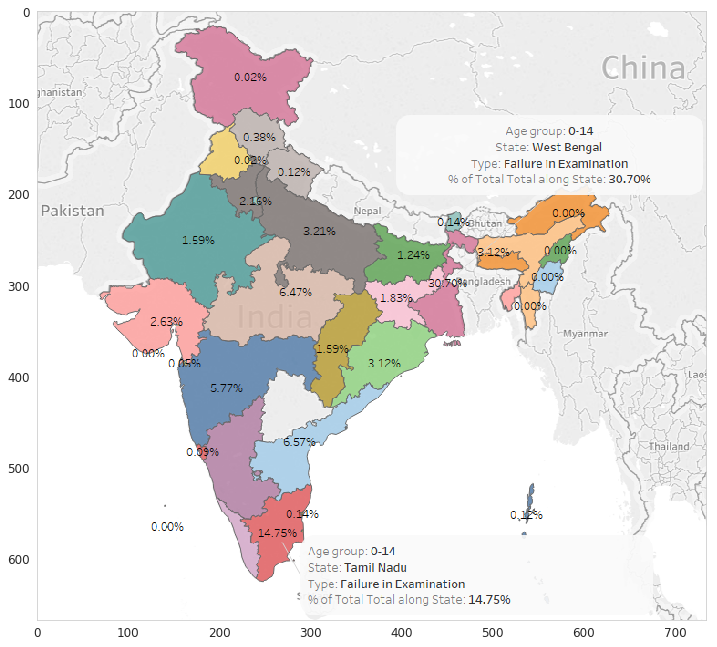

In [0]:
# Read Images 
img = mpimg.imread('agee.PNG') 
  
# Output Images 
plt.figure(figsize=(12,12))
plt.grid(linewidth='0')
plt.imshow(img)

**15-29**

---



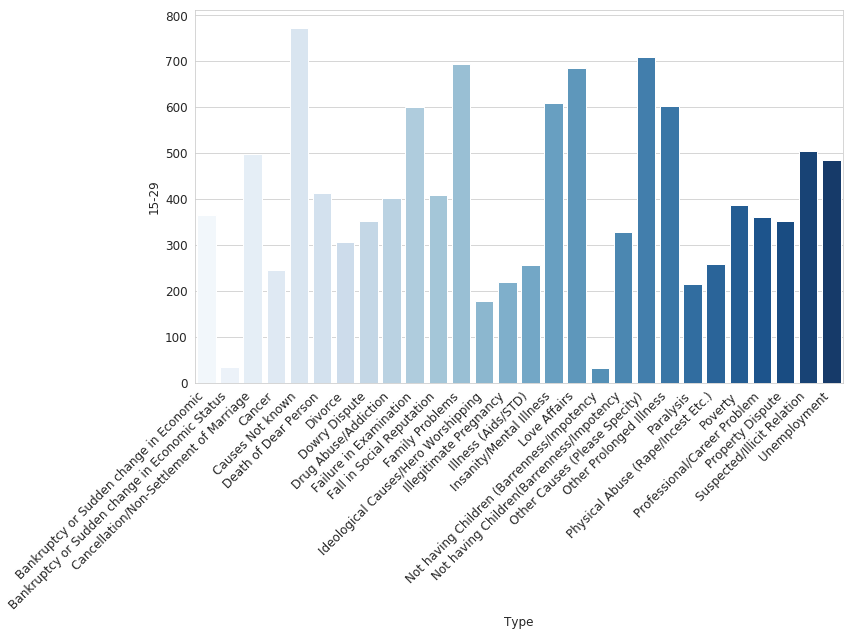

In [0]:
plt.figure(figsize=(12,9))
sns.barplot(x='Type',y='15-29',data=ct,palette='Blues')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

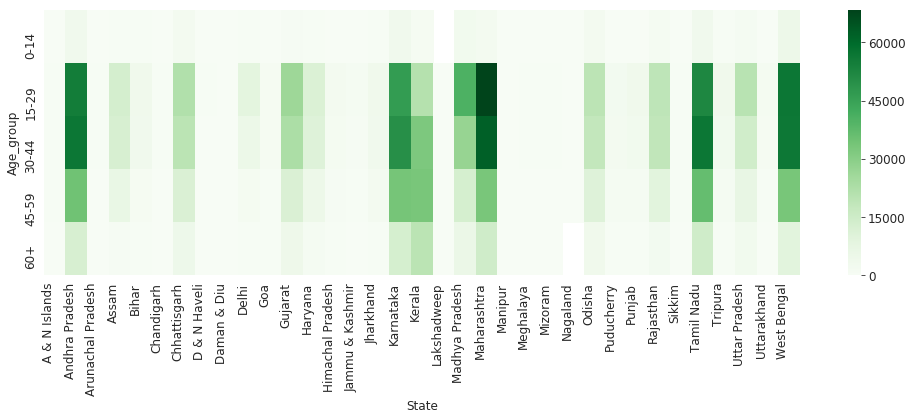

In [0]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='Greens')
plt.tight_layout()

## Conclusion

### Results
The summary of results about risk factors, means of suicides and profession of suicide victims 

#### Results related to the risk factors for suicides
Males and Females up to 14 years’ age group commit suicide due to ‘Failure in examination’.

Males between age group 15–29 commit suicide due to ‘Failure in examination’ whereas Females within the same age group commit suicide due to ‘Love affairs’.

Males between age group above 30 commit suicide due to ‘Unemployment’, ‘Love Affairs’ and ‘Failure in examination’, while Females between the same age group are observed to commit suicide due to ‘Dowry Dispute’ and ‘Cancellation/Non-settlement of Marriage’.

Males and Females between age group 30–45 commit suicide due to ‘Family problems’ while Males between age group 45–60 commit suicide due to ‘Bankruptcy/sudden change in Economic status’ and ‘Poverty’.

#### Results related to means of suicides
Females between age group up to 14 years’ and 15–29 commit suicide by ‘Fire/self-immolation’, ‘Hanging’ and ‘Poisoning’.

Males between age group 30–44 commit suicide by ‘Hanging’, ‘Poisoning’ and coming under running vehicles/trains while Females commit suicide by ‘Fire/self-immolation’.

Males between age group 45–59 and above 60 years commit suicide by ‘Coming under running vehicles/trains’ and ‘Poisoning’ while Females above 60 years’ commit suicide by ‘Drowning’.

#### Results related to the profession of suicide victims
Male and Female with profession ‘Students’ up to age 14 and ‘Unemployed Males’ between age group 15–29 commit suicide.

Males with profession ‘Service’ between age group 30–44 and ‘House wife’ between age group 15–29, 45–59 and above 60 years’ age commit suicide.

**Overall the suicidal death rate in India is observed to be continuously increasing. From 2001 to 2012 suicidal death percentage increase is 24.8% which is very scary**




**The results obtained gives us the clear vision about what type of population is highly affected by this problem. Government should take the preventive measures in bringing down number of suicides in our country by giving more attention on the population that is mostly affected in their respective states.** 